# Garcia attributes using Miranda images vs Miranda Attributes

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os, random, time
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
#Miranda dataset
train_dataset_url = "DatasetMiranda/features_train_70000.csv"
test_dataset_url = "DatasetMiranda/features_test_70000.csv"

#Miranda images, García attributes V1
train_dataset_urlG1 = "DatasetStegonomonoV1/train_5000.csv"
test_dataset_urlG1 = "DatasetStegonomonoV1/test_5000.csv"

#Miranda images, García attributes V2
train_dataset_urlG2 = "DatasetStegonomonoV2/train_5000.csv"
test_dataset_urlG2 = "DatasetStegonomonoV2/test_5000.csv"

In [3]:
generalLabel={'Kurtosis':"0", 'Skewness':"1", 'Std':"2", 'Range':"3", 'Median':"4",'Geometric_Mean':"5", 'Garcia_Geomean':"6", 'Epsilon_Geomean':"7",'Mobility':"8", 'Complexity':"9"}

In [5]:
#%% Importing the dataset
MirandaLabels= [generalLabel[attr] for attr in ['Kurtosis', 'Skewness', 'Std', 'Range', 'Median', 'Geometric_Mean', 'Mobility', 'Complexity']]
trainDataset = pd.read_csv(train_dataset_url)
MirandaX_train = trainDataset.iloc[:, :-1].values
MirandaY_train = trainDataset.iloc[:, -1].values

testDataset = pd.read_csv(test_dataset_url)
MirandaX_test = testDataset.iloc[:, :-1].values
MirandaY_test = testDataset.iloc[:, -1].values

#%% Importing the dataset stegonomono V1
G1Labels=[generalLabel[attr] for attr in ['Kurtosis', 'Skewness', 'Std', 'Range', 'Median', 'Geometric_Mean', 'Mobility', 'Complexity']]
trainDataset = pd.read_csv(train_dataset_urlG1,header=None)
G1X_train = pd.DataFrame(trainDataset.iloc[:, :-2].values,columns=G1Labels)
G1Y_train = trainDataset.iloc[:, -2].values

testDataset = pd.read_csv(test_dataset_urlG1,header=None)
G1X_test = pd.DataFrame(testDataset.iloc[:, :-2].values,columns=G1Labels)
G1Y_test = testDataset.iloc[:, -2].values

#%% Importing the dataset stegonomono V2
G2Labels=['Kurtosis', 'Skewness', 'Std', 'Range', 'Median', 'Garcia_Geomean', 'Epsilon_Geomean','Mobility', 'Complexity']
trainDataset = pd.read_csv(train_dataset_urlG2,header=None)
G2X_train = pd.DataFrame(trainDataset.iloc[:, :-1].values,columns=G2Labels)
G2X_train["Kurtosis"]=[float(x[1:-1]) for x in G2X_train["Kurtosis"]]
G2Y_train = trainDataset.iloc[:, -1].values
G2X_train.columns=[generalLabel[attr] for attr in G2Labels]

testDataset = pd.read_csv(test_dataset_urlG2,header=None)
G2X_test = pd.DataFrame(testDataset.iloc[:, :-1].values,columns=G2Labels)
G2X_test["Kurtosis"]=[float(x[1:-1]) for x in G2X_test["Kurtosis"]]
G2Y_test = testDataset.iloc[:, -1].values

G2LabelsF=[generalLabel[attr] for attr in G2Labels]

In [6]:
#%% Feature Scaling
from sklearn.preprocessing import StandardScaler

### EDA

##### Dataset looks homogeneous

#### Standard scalling

In [7]:
scG1=StandardScaler()
sc_Garcia1X_train=pd.DataFrame(scG1.fit_transform(G1X_train),columns=G1Labels)
sc_Garcia1X_test=pd.DataFrame(scG1.transform(G1X_test),columns=G1Labels)

scG2=StandardScaler()
sc_Garcia2X_train=pd.DataFrame(scG2.fit_transform(G2X_train),columns=G2LabelsF)
sc_Garcia2X_test=pd.DataFrame(scG2.transform(G2X_test),columns=G2LabelsF)

scM=StandardScaler()
sc_MirandaX_train=pd.DataFrame(scM.fit_transform(MirandaX_train),columns=MirandaLabels)
sc_MirandaX_test=pd.DataFrame(scM.transform(MirandaX_test),columns=MirandaLabels)

### Modelling

In [8]:
import statsmodels.api as sm
logit_model=sm.Logit(MirandaY_train,sc_MirandaX_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.264509
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.618     
Dependent Variable: y                AIC:              29640.4288
Date:               2021-10-01 21:19 BIC:              29711.8935
No. Observations:   55999            Log-Likelihood:   -14812.   
Df Model:           7                LL-Null:          -38816.   
Df Residuals:       55991            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
--------------------------------------------------------------------
      Coef.     Std.Err.       z        P>|z|      [0.025     0.975]
--------------------------------------------------------------------
0    -0.7686      0.0737    -10.4343    0.0000    -0.9129    -0.6242
1     1.0767      0.0673     15.9897    0.0000     0.9

In [9]:
import statsmodels.api as sm
logit_modelG1=sm.Logit(G1Y_train,sc_Garcia1X_train)
result=logit_modelG1.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.340509
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.509    
Dependent Variable: y                AIC:              2740.0695
Date:               2021-10-01 21:19 BIC:              2790.4219
No. Observations:   4000             Log-Likelihood:   -1362.0  
Df Model:           7                LL-Null:          -2772.6  
Df Residuals:       3992             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
-------------------------------------------------------------------
      Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
-------------------------------------------------------------------
0     0.0271      0.2484     0.1090    0.9132    -0.4597     0.5138
1    -0.9426      0.2328    -4.0493    0.0001    -1.3988    -0.486

In [10]:
import statsmodels.api as sm
logit_modelG2=sm.Logit(G2Y_train,sc_Garcia2X_train)
result=logit_modelG2.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.338752
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.511    
Dependent Variable: y                AIC:              2728.0122
Date:               2021-10-01 21:19 BIC:              2784.6586
No. Observations:   4000             Log-Likelihood:   -1355.0  
Df Model:           8                LL-Null:          -2772.6  
Df Residuals:       3991             LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     7.0000                                      
-------------------------------------------------------------------
      Coef.     Std.Err.       z       P>|z|      [0.025     0.975]
-------------------------------------------------------------------
0    -0.0594      0.2533    -0.2345    0.8146    -0.5558     0.4370
1    -0.8707      0.2367    -3.6783    0.0002    -1.3347    -0.406

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(sc.fit_transform(newX), y, test_size=0.2, random_state=0)
logregMiranda = LogisticRegression()
logregMiranda.fit(sc_MirandaX_train, MirandaY_train)
y_predMiranda = logregMiranda.predict(sc_MirandaX_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logregMiranda.score(sc_MirandaX_test, MirandaY_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [12]:
logregGarcia1 = LogisticRegression()
logregGarcia1.fit(sc_Garcia1X_train, G1Y_train)
y_predGarcia1 = logregGarcia1.predict(sc_Garcia1X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logregGarcia1.score(sc_Garcia1X_test, G1Y_test)))
print(metrics.f1_score(G1Y_test,y_predGarcia1))

Accuracy of logistic regression classifier on test set: 0.86
0.8571428571428571


In [13]:
logregGarcia2 = LogisticRegression()
logregGarcia2.fit(sc_Garcia2X_train, G2Y_train)
y_predGarcia2 = logregGarcia2.predict(sc_Garcia2X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logregGarcia2.score(sc_Garcia2X_test, G2Y_test)))
print(metrics.f1_score(G2Y_test,y_predGarcia2))

Accuracy of logistic regression classifier on test set: 0.86
0.8553590010405827


# SUBPLOT & SAVE + LEGEND

In [154]:
generalLabelString=""
for k,v in generalLabel.items():
    generalLabelString+=v+": "+k+", "


In [155]:
generalLabelString

'0: Kurtosis, 1: Skewness, 2: Std, 3: Range, 4: Median, 5: Geometric_Mean, 6: Garcia_Geomean, 7: Epsilon_Geomean, 8: Mobility, 9: Complexity, '

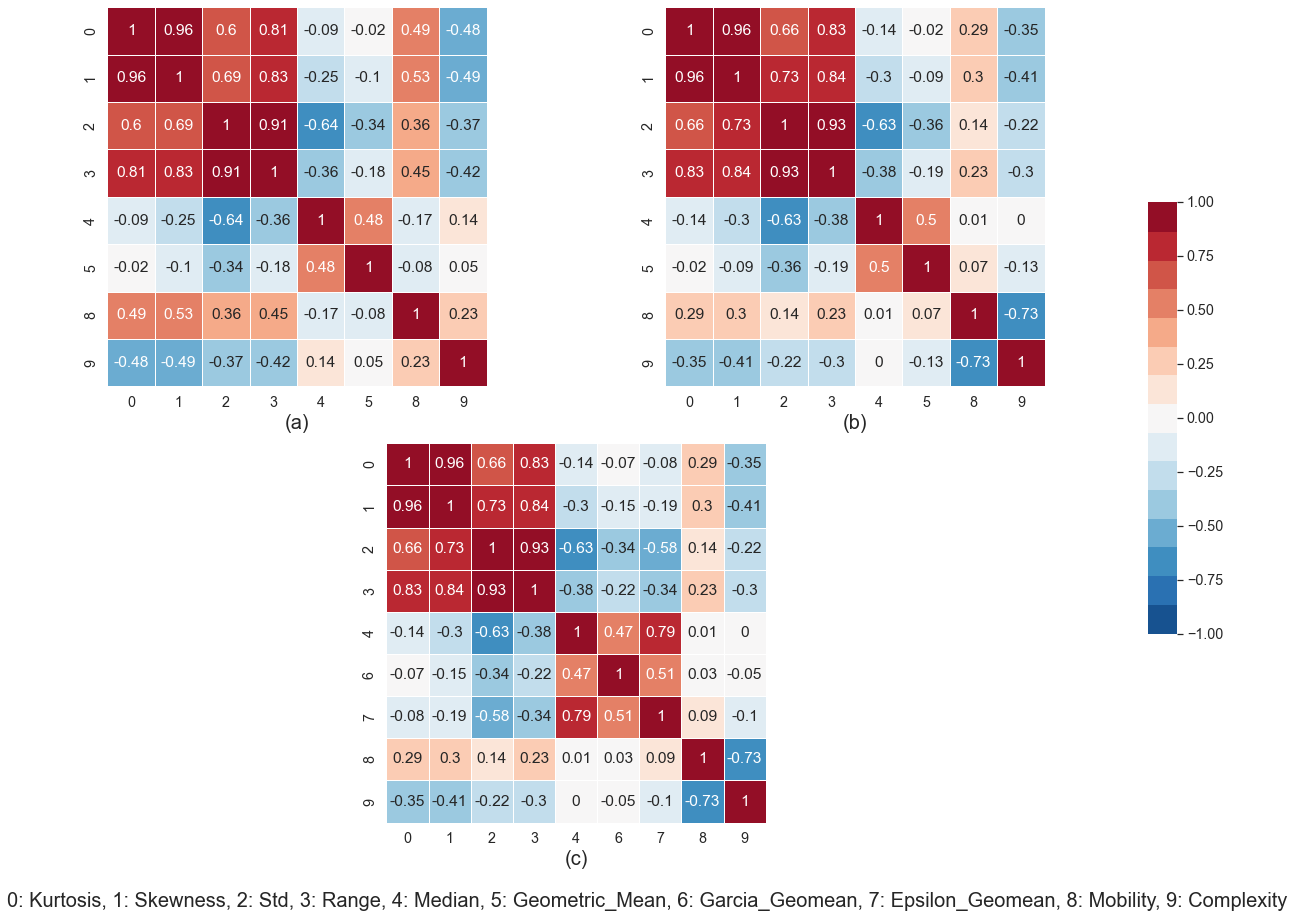

In [170]:
fig, axs = plt.subplots(ncols=2,nrows=2, gridspec_kw=dict(width_ratios=[30,30]),figsize=(20, 15))
grid = plt.GridSpec(2, 2, figure=fig, wspace = 0, hspace = .15,width_ratios=[30,30],height_ratios=[40,40])

# axs[0,0].set_xlabel("(a)") #"Miranda's correlation matrix"
# axs[0,1].set_xlabel("(b)") #"Garcías's V1 correlation matrix"
# axs[1,1].set_xlabel("(c)") #"Garcías's V2 correlation matrix"
sns.set(font_scale=1.3)

ax0=plt.subplot(grid[0,0])
corr = sc_MirandaX_train.corr().round(decimals=2)
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r",15), center=0,
            square=True,cbar_kws={"shrink":0.5}, linewidths=.5, cbar=False)


ax1=plt.subplot(grid[0, 1])
corr = sc_Garcia1X_train.corr().round(decimals=2)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r",15), center=0,
            square=True,cbar_kws={"shrink":0.5}, cbar=False,linewidths=.5)
cbar_ax = fig.add_axes([.91, .3, .02, .4])

ax2=plt.subplot(grid[1, :])
corr = sc_Garcia2X_train.corr().round(decimals=2)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r",15), center=0,
            square=True, linewidths=.5,cbar_ax=cbar_ax)#, cbar_kws={"shrink":0.4}) 



ax0.set_xlabel("(a)",fontsize = 20) #"Miranda's correlation matrix"
ax1.set_xlabel("(b)",fontsize = 20) #"Garcías's V1 correlation matrix"
ax2.set_xlabel("(c)",fontsize = 20) #"Garcías's V2 correlation matrix"

plt.text(-9,11,generalLabelString[:-2],fontsize = 20)





plt.savefig('CorrMatrix.png', dpi=300, bbox_inches="tight")


import seaborn as sns
sns.set_theme(style="dark")
corr = sc_MirandaX_train.corr()

fig, axs = plt.subplots(ncols=2,nrows=2, gridspec_kw=dict(width_ratios=[40,40]),figsize=(20, 15))

#spec2 = gridspec.GridSpec(ncols=3, nrows=2, figure=fig)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r",15), center=0,
            square=True,cbar_kws={"shrink":0.5}, linewidths=.5, cbar=False,ax=axs[0,0])

corr = sc_Garcia1X_train.corr()
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r",15), center=0,
            square=True,cbar_kws={"shrink":0.5}, cbar=False,linewidths=.5,ax=axs[0,1])

corr = sc_Garcia2X_train.corr()
# Draw the heatmap with the mask and correct aspect ratio
fig.add_subplot(gs[1, :])
sns.heatmap(corr, annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette("RdBu_r",15), center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":0.4},ax=axs[1, 1]) 

axs[0,0].set_xlabel("(a)") #"Miranda's correlation matrix"
axs[0,1].set_xlabel("(b)") #"Garcías's V1 correlation matrix"
axs[1,1].set_xlabel("(c)") #"Garcías's V2 correlation matrix"





plt.show()
#plt.savefig('CorrMatrix.png', dpi=200)

# SORT BY MAGNITUDE + LABEL NAME + COLOR FIX + legend

# CHECK IF GARCIAV1 HAS

In [202]:
dicMiranda={MirandaLabels[i]:logregMiranda.coef_[0][i] for i in range(len(MirandaLabels))}

In [203]:
dicG1={G1Labels[i]:logregGarcia1.coef_[0][i] for i in range(len(G1Labels))}

In [204]:
dicG2={G2LabelsF[i]:logregGarcia2.coef_[0][i] for i in range(len(G2LabelsF))}

In [205]:
dicMiranda=dict(sorted(dicMiranda.items(),reverse=True, key=lambda item: abs(item[1])))
dicG1=dict(sorted(dicG1.items(),reverse=True, key=lambda item: abs(item[1])))
dicG2=dict(sorted(dicG2.items(),reverse=True, key=lambda item: abs(item[1])))

In [227]:
sns.color_palette("deep")

10

In [226]:
len(generalLabel)

10

In [228]:
generalLabelColorDic={str(i):sns.color_palette("deep")[i] for i in range(10)}

In [234]:
generalLabelColorDic

{'0': (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 '1': (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 '2': (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 '3': (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 '4': (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 '5': (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 '6': (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 '7': (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 '8': (0.8, 0.7254901960784313, 0.4549019607843137),
 '9': (0.39215686274509803, 0.7098039215686275, 0.803921568627451)}

In [233]:
[generalLabelColorDic[list(dicMiranda.keys())[i]] for i in range(8)]

[(0.39215686274509803, 0.7098039215686275, 0.803921568627451),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941)]

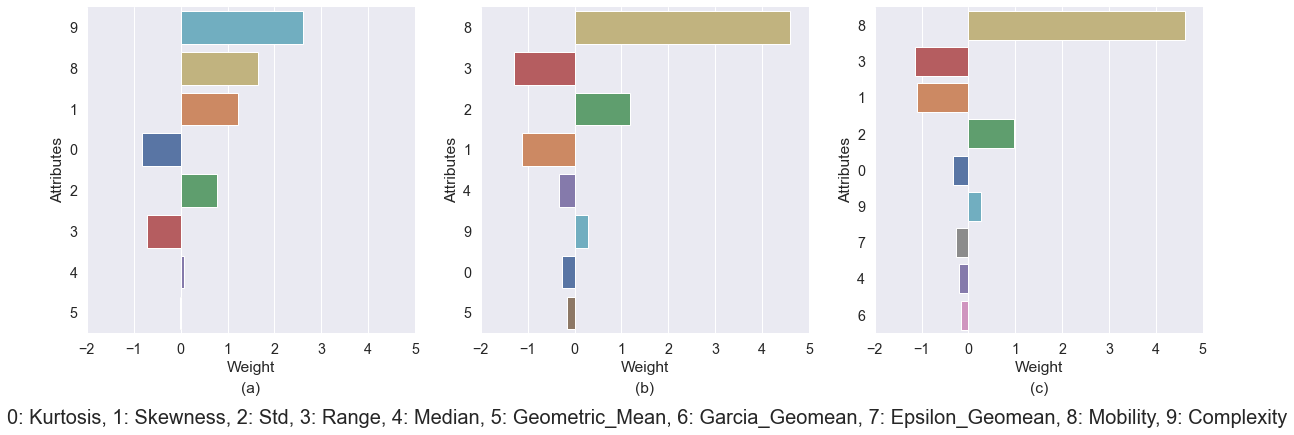

In [239]:
fig, axs = plt.subplots(ncols=3,figsize=(20, 6))

for ax in axs:
    ax.set(xlim=(-2,5))

sns.barplot(y=list(dicMiranda.keys()),x=list(dicMiranda.values()),ax=axs[0], palette=generalLabelColorDic)
axs[0].set( xlabel="Weight",
      ylabel ="Attributes")
sns.despine(left=True, bottom=True)

sns.barplot(y=list(dicG1.keys()),x=list(dicG1.values()),ax=axs[1], palette=generalLabelColorDic)
axs[1].set( xlabel="Weight",
      ylabel ="Attributes", title="(b)") 

sns.despine(left=True, bottom=True)

sns.barplot(y=list(dicG2.keys()),x=list(dicG2.values()),ax=axs[2], palette=generalLabelColorDic)
axs[2].set( xlabel="Weight",
      ylabel ="Attributes")
sns.despine(left=True, bottom=True)


axs[0].set_title("(a)",y=-0.2) #"Weights for Miranda Attributes in Miranda Dataset"
axs[1].set_title("(b)",y=-0.2) #"Weights for Miranda Attributes in Miranda Subset"
axs[2].set_title("(c)",y=-0.2) #"Weights for García Attributes in Miranda subset"

plt.text(-20.5,11,generalLabelString[:-2],fontsize = 20)
plt.savefig('Weights.png', dpi=300, bbox_inches="tight")

In [240]:
generalLabel

{'Kurtosis': '0',
 'Skewness': '1',
 'Std': '2',
 'Range': '3',
 'Median': '4',
 'Geometric_Mean': '5',
 'Garcia_Geomean': '6',
 'Epsilon_Geomean': '7',
 'Mobility': '8',
 'Complexity': '9'}

TypeError: 'dict' object cannot be interpreted as an integer

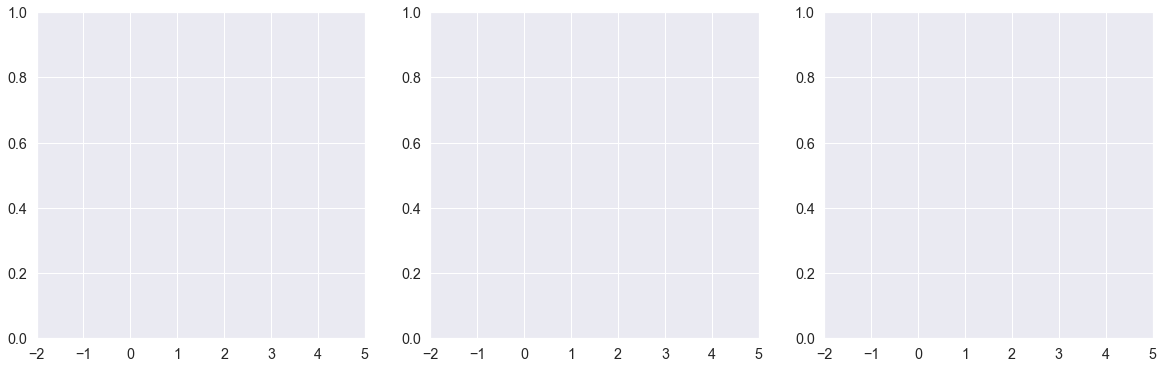

In [235]:
fig, axs = plt.subplots(ncols=3,figsize=(20, 6))

for ax in axs:
    ax.set(xlim=(-2,5))

sns.barplot(y=list(dicMiranda.keys()),x=list(dicMiranda.values()),ax=axs[0], palette=[generalLabelColorDic[list(dicMiranda.keys())[i]] for i in range(dicMiranda)])
axs[0].set( xlabel="Weight",
      ylabel ="Attributes")
sns.despine(left=True, bottom=True)

sns.barplot(y=list(dicG1.keys()),x=list(dicG1.values()),ax=axs[1], palette=[generalLabelColorDic[list(dicG1.keys())[i]] for i in range(dicG1)])
axs[1].set( xlabel="Weight",
      ylabel ="Attributes", title="(b)") 

sns.despine(left=True, bottom=True)

sns.barplot(y=list(dicG2.keys()),x=list(dicG2.values()),ax=axs[2], palette=[generalLabelColorDic[list(dicG2.keys())[i]] for i in range(dicG2)])
axs[2].set( xlabel="Weight",
      ylabel ="Attributes")
sns.despine(left=True, bottom=True)


axs[0].set_title("(a)",y=-0.2) #"Weights for Miranda Attributes in Miranda Dataset"
axs[1].set_title("(b)",y=-0.2) #"Weights for Miranda Attributes in Miranda Subset"
axs[2].set_title("(c)",y=-0.2) #"Weights for García Attributes in Miranda subset"

plt.text(-20.5,11,generalLabelString[:-2],fontsize = 20)
plt.savefig('Weights.png', dpi=300, bbox_inches="tight")

In [ ]:
f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(y=G2Labels,x=logregGarcia2.coef_[0])
ax.set( xlabel="Weight",
      ylabel ="Attributes", title="Weights for García Attributes in Miranda subset")
sns.despine(left=True, bottom=True)

In [ ]:

plt.show()